# [Tensorflow-2 Object Detection Trainer](https://github.com/sglvladi/TensorFlowObjectDetectionTutorial/tree/725f22217178537030fde9492a7cdb0a7fff4d80)

# Prerequisites

We assume that this notebok will be run using __JupyterLab__ with __Anaconda__ environment on __Linux (Ubuntu)__ server. Although most part of it is independent of the above platform and frameworks, you may need to customize them a little to run on other environments.

Installation of [JupyterLab](https://jupyter.org/) is simple. This notebook was tested on JupyterLab v3.0.9 and Python v3.8.5. You may use the following commands to install JupyterLab on a separate conda environment, say `jupyter-lab`,

```bash
conda install -c conda-forge jupyterlab=3.0
```

and to start JupyterLab, execute the following command.

```bash
jupyter lab --no-browser --ip="0.0.0.0" --port=8989
```

We also assume that this notebook is placed at the root of your __tf2-object-detection-trainer__ project.

## Environment Setup and Kernel Installation

If you have not created a separate conda environment for your __tf2-object-detection-trainer__ project using this notebook, it is recommended that you create one now. The following code-cells automatically installs the required dependencies for your environment. If you already have an environment, you may skip this step and moce on to __"Environment Switch"__ section.

#### Set Environment Name

Set your preferred environment name below into the variable *`ENV_NAME`*, default is *`tf2-object-detection-trainer`*. This name will be used everywhere throughout the project.

In [ ]:
ENV_NAME = 'tf2-object-detection-trainer'

#### Create Your Environment

In [ ]:
!conda create --yes -n {ENV_NAME} pip python=3.8.5 jupyterlab=3.0

#### Install iPython Kernel 

The following code cell will install your newly created conda environment as an iPython kernel to be used with Jupyter

In [ ]:
import sys

out = !conda env list | grep {ENV_NAME}
env = out[0][out[0].index('/'):]

!{env}/bin/python -m ipykernel install --prefix {sys.prefix} --name {ENV_NAME} --display-name {ENV_NAME}

## Environment Switch

Now that your kernel is instaled, you'll need to change your Jupyter Notebook's python environment (kernel) to the one that you have created. You'll find the option to switch kernel on top-right of your notebook.

<div>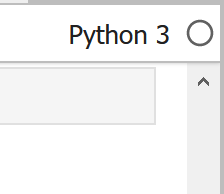</div>
<div>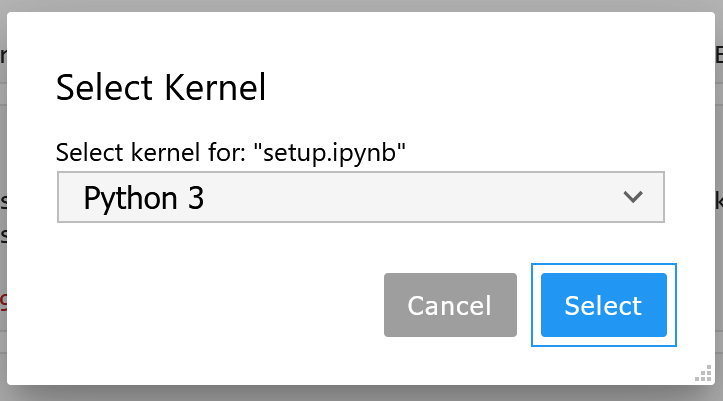</div>

If you don't find your environment in the dropdown, try refreshing/restarting your Jupyter server.


Confirm that you have successfully switched your kernel by the following code cell. It should print the *`ENV_NAME`* you had built earlier. If it prints something else, then the kernel switch wasn't successful. Fix it before proceeding further.

In [1]:
import sys

ENV_NAME = sys.prefix
ENV_NAME = ENV_NAME[ENV_NAME.rindex('/')+1:]

ENV_NAME

'tf2-object-detection-trainer'

## Object Detection API Installation

Now that we have our environment ready, lets clone the *`tensorflow/models`* github repository. We'll switch to commit *`73ce096`* to so that our code doesn't break dur to subsequent updates in the repository. We'll put the cloned repo in a folder named *`tensorflow`*.

In [ ]:
# !rm -rf tensorflow
!git clone https://github.com/tensorflow/models tensorflow/models 2> /dev/null
!(cd tensorflow/models;git checkout 73ce096)

## ProtocolBuffer Installation

Now lets download and extract protobuf v3.13.0 into a folder named *`protoc`*

In [ ]:
!wget https://github.com/protocolbuffers/protobuf/releases/download/v3.13.0/protoc-3.13.0-linux-x86_64.zip -c
!unzip protoc-3.13.0-linux-x86_64.zip -d protoc

We'll install protoc into *`tensorflow/models/research`*

In [ ]:
from os import environ as export

pwd = !pwd
export['PATH'] += ':' + pwd[0] + '/protoc/bin'
!(cd tensorflow/models/research;protoc object_detection/protos/*.proto --python_out=.)

## Python Dependency Installation

We will install all required python dependencies directly from this notebook. For this, we'll need a reference to the python executable of our conda environment.

In [ ]:
from sys import executable as python

### Installing GPU Version

We'll install TensorFlow-GPU version 2.4 and its dependency CUDAToolkit version 11.2

In [ ]:
!conda install --yes --prefix {sys.prefix} -c anaconda cudatoolkit=11.0 absl-py=0.10
!{python} -m pip install tensorflow-gpu==2.4 python-util==1.2.1 absl-py

#### cuDNN-8 Installation

At the time of writing this script, Anaconda's cudatoolkit-11 does not automatically install cuDNN-8. Hence you'll need to install it manually.
Download cuDNN-8 packages from [here](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/8.1.0.77/11.2_20210127/cudnn-11.2-linux-x64-v8.1.0.77.tgz) and place it into your project's root. Once done, execute the following code-cell to set it up. 

In [ ]:
!mkdir cuDNN8
!tar -xzvf cudnn-11.2-linux-x64-v8.1.0.77.tgz -C cuDNN8
!chmod a+x cuDNN8/cuda/include/cudnn*.h cuDNN8/cuda/lib64/libcudnn*

### Installing Non-GPU Version

Install TensorFlow version 2.4

In [ ]:
!{python} -m pip install tensorflow==2.4

### Automatic Installation Of Other Dependencies

Run the following code-cell to automatically install all other python dependencies.

In [ ]:
!cp tensorflow/models/research/object_detection/packages/tf2/setup.py tensorflow/models/research/
!{python} -m pip install tensorflow/models/research/

### Manual Installation of Dependencies (Only if automatic installation fails)

Run the following code-cell to manually install all other python dependencies.

In [ ]:
# !{python} -m pip install tf_slim==1.1.0 matplotlib==3.3.4 lvis==0.5.3 scipy==1.6.1 pyyaml==5.4.1 gin-config==0.4.0 tensorflow-addons==0.12.1 pandas==1.2.2

### List Installed Packages

You can use the following code-cell to list all dependencies in your environment

In [ ]:
!conda list --prefix {sys.prefix}

### Uninstalling Dependencies

If you ever want to remove a python package, you can use the following example

In [ ]:
# !{python} -m pip uninstall -y tf_slim

### PyCOCOTools Installation

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git cocoapi 2> /dev/null
!(cd cocoapi;git checkout 8c9bcc3)

!conda install --yes --prefix {sys.prefix} cython
!(cd cocoapi/PythonAPI/; printf 'conda activate {ENV_NAME}\nmake\n' | bash -i )

!cp -r ./cocoapi/PythonAPI/pycocotools ./tensorflow/models/research/

## Test Your Installation

### cuDNN Reference for GPU 

In [ ]:
from os import environ as export
export['LD_LIBRARY_PATH']='cuDNN8/cuda/lib64/:'

### Test

If the below code runs successfully, you have your environment ready.

In [ ]:
!{python} -c "import tensorflow as tf;print(tf.reduce_sum(tf.random.normal([1000, 1000])))"

## Done!

Your setup is complete. Now you can start your training below.

## Delete Environment and Remove Kernel

If you want to delete kernels and conda environments from this notebook, you may use the following examples.

In [2]:
ENV_NAME = 'tf2-object-detection-trainer'

In [ ]:
import sys

!echo rm -rf {sys.prefix}/share/jupyter/kernels/{ENV_NAME}
# !conda remove --yes --name {ENV_NAME} --all

In [ ]:
# !conda clean --yes --all

# Training

## Prerequisites

We assume that this will be run using __JupyterLab__ with __Anaconda__ environment on __Linux (Ubuntu 18.04)__ server. Although most part of it is independent of the above platform and frameworks, you may need to customize them to run on other environments.

At this point you should already have your data/images labeled/annotated. This script only helps in starting the model training pipeline and doesn't involve data annotation. For getting your images annotated, you may use [LabelImg](https://github.com/tzutalin/labelImg).

Confirm that you using the correct kernel for your object detection pipeline. The following code-cell should print the ENV_NAME you had built earlier using the [setup.ipynb](../setup.ipynb). If it prints something else, switch your kernel to the desired one.

In [1]:
import sys

%mkdir -p targets
%cd targets

ENV_NAME = sys.prefix
ENV_NAME = ENV_NAME[ENV_NAME.rindex('/')+1:]

ENV_NAME

/home/uniquetrij/Projects/jupyter-lab/tf2-object-detection-trainer/targets


'tf2-object-detection-trainer'

## Target Selection And Project Structure

Select your target folder for your object detection training project.

In [2]:
TARGET = 'kraft-pepsico-detection'

### Build Your Project Structure

Below is the default names of the folders inside your project folder. You may leave them as is. This script automatically builds the project structure for you.

In [3]:
ANNOTATIONS = 'annotations'
EXPORTED = 'exported-models'
IMAGES = 'images'
TEST_DATA = 'test'
TRAIN_DATA = 'train'
LABEL_MAP = 'label_map.pbtxt'
MODELS = 'models'
INFERENCE = 'inference'
PRETRAINED = '.pre-trained-models'

In [5]:
!mkdir -p {TARGET}/{IMAGES}/{TEST_DATA}
!mkdir -p {TARGET}/{IMAGES}/{TRAIN_DATA}
!mkdir -p {TARGET}/{ANNOTATIONS}
!mkdir -p {TARGET}/{EXPORTED}
!mkdir -p {TARGET}/{MODELS}
!mkdir -p {TARGET}/{INFERENCE}
!mkdir -p {PRETRAINED}

Here we'll set reference to tensorflow's `objec-detection` folder's parent in the variable *`TF_OD_PATH`*. If you are following the instructions of these scripts it should be *`../tensorflow/models/research`*.

In [4]:
TF_OD_PATH = '../tensorflow/models/research'

import sys
from sys import executable as python
from os import environ as export

## Import Images and Labels

You'll need to manually copy your images and labels into the `images` folder of your target project. You need not split your data manually. The following code section does that for you. 

In [83]:
!wget https://raw.githubusercontent.com/sglvladi/TensorFlowObjectDetectionTutorial/725f22217178537030fde9492a7cdb0a7fff4d80/docs/source/scripts/partition_dataset.py -c       

!pip install pyutil
from pyutil import filereplace

filereplace("partition_dataset.py","import random.*", 
'''import random;random.seed(3)'''
)

FRACTION_OF_TEST_DATA = 0.1

!rm -rf {TARGET}/{IMAGES}/{TEST_DATA}
!rm -rf {TARGET}/{IMAGES}/{TRAIN_DATA}

!{python} partition_dataset.py -x -i {TARGET}/{IMAGES} -r {FRACTION_OF_TEST_DATA}

--2021-04-19 00:07:12--  https://raw.githubusercontent.com/sglvladi/TensorFlowObjectDetectionTutorial/725f22217178537030fde9492a7cdb0a7fff4d80/docs/source/scripts/partition_dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



## Create Your Label Map

In [5]:
def get_labels():
    from xml.dom import minidom
    import glob
    objects = set()
    xmls = glob.glob('{}/{}/*.xml'.format(TARGET,IMAGES))

    for xml in xmls:
        xmldoc = minidom.parse(xml)
        itemlist = xmldoc.getElementsByTagName('name')
        for item in itemlist:
            objects.add(item.firstChild.nodeValue)
    return objects

labels = list(get_labels())

def generate_labemlap():    
    from IPython.core.getipython import get_ipython
    shell = get_ipython()
    content = "%%writefile {TARGET}/{ANNOTATIONS}/{LABEL_MAP}"    
    for i in range(len(labels)):
        content+='''
item {{
  id: {}
  name: '{}'
  display_name: '{}'
}}'''.format(i+1, labels[i], labels[i].replace("_"," ").title())
    content+="\n\n# generate_labemlap()"
    shell.set_next_input(content, replace=True)
    print("Template created. Re-run this code-cell to save your labelmap file")

Running the following code-cell will create the basic template of your label map for you to edit. Once done, re-run the cell to save the labelmap file.

In [13]:
%%writefile {TARGET}/{ANNOTATIONS}/{LABEL_MAP}
item {
  id: 1
  name: 'Colgate Tooth Paste'
  display_name: 'Colgate Tooth Paste'
}
item {
  id: 2
  name: 'planters_cheezballs'
  display_name: 'Planters Cheezballs'
}
item {
  id: 3
  name: 'Thumsup tin'
  display_name: 'Thumsup Tin'
}
item {
  id: 4
  name: 'macaroni_cheese'
  display_name: 'Macaroni Cheese'
}
item {
  id: 5
  name: 'Kelloggs Corn Flakes'
  display_name: 'Kelloggs Corn Flakes'
}
item {
  id: 6
  name: 'slice'
  display_name: 'Slice'
}
item {
  id: 7
  name: 'mirinda'
  display_name: 'Mirinda'
}
item {
  id: 8
  name: 'aquafina'
  display_name: 'Aquafina'
}
item {
  id: 9
  name: 'Tropicana Guava'
  display_name: 'Tropicana Guava'
}
item {
  id: 10
  name: 'mustard'
  display_name: 'Mustard'
}
item {
  id: 11
  name: 'pepsi zero sugarw'
  display_name: 'Pepsi Zero Sugarw'
}
item {
  id: 12
  name: '7up'
  display_name: '7Up'
}
item {
  id: 13
  name: 'Cocacola tin'
  display_name: 'Cocacola Tin'
}
item {
  id: 14
  name: 'Apple'
  display_name: 'Apple'
}
item {
  id: 15
  name: 'Pampers Pants'
  display_name: 'Pampers Pants'
}
item {
  id: 16
  name: 'Nescafe Classic Coffee'
  display_name: 'Nescafe Classic Coffee'
}
item {
  id: 17
  name: 'tomato_ketchup'
  display_name: 'Tomato Ketchup'
}
item {
  id: 18
  name: 'diet pepsi'
  display_name: 'Diet Pepsi'
}
item {
  id: 19
  name: 'Cheetos Crunchy'
  display_name: 'Cheetos Crunchy'
}
item {
  id: 20
  name: 'Hersheys choco syrup'
  display_name: 'Hersheys Choco Syrup'
}
item {
  id: 21
  name: 'pepsi zero sugar'
  display_name: 'Pepsi Zero Sugar'
}

# generate_labemlap()

Template created. Re-run this code-cell to save your labelmap file


Add Tensorflow's *`models`* and *`research`* packages to your *`PYTHONPATH`*

In [6]:
export['PYTHONPATH']=TF_OD_PATH+'/models/research/:' 
export['PYTHONPATH']+=TF_OD_PATH+'/:'

In [ ]:
AttributeError: module 'google.protobuf.descriptor' has no attribute '_internal_create_key'

Now we'll generate TF-Record files from out annotated images

In [87]:
!wget https://raw.githubusercontent.com/sglvladi/TensorFlowObjectDetectionTutorial/725f22217178537030fde9492a7cdb0a7fff4d80/docs/source/scripts/generate_tfrecord.py -c     

!{python} generate_tfrecord.py -x {TARGET}/{IMAGES}/{TRAIN_DATA} -l {TARGET}/{ANNOTATIONS}/{LABEL_MAP} -o {TARGET}/{ANNOTATIONS}/train.record

!{python} generate_tfrecord.py -x {TARGET}/{IMAGES}/{TEST_DATA} -l {TARGET}/{ANNOTATIONS}/{LABEL_MAP} -o {TARGET}/{ANNOTATIONS}/test.record



--2021-04-19 00:07:52--  https://raw.githubusercontent.com/sglvladi/TensorFlowObjectDetectionTutorial/725f22217178537030fde9492a7cdb0a7fff4d80/docs/source/scripts/generate_tfrecord.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Successfully created the TFRecord file: kraft-pepsico-detection/annotations/train.record
Successfully created the TFRecord file: kraft-pepsico-detection/annotations/test.record


## Pretrained Model 

### Tensorflow Model Zoo
Download your desired model from Tensorflow's [model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md). For this, you can set the variable *`MODEL_DOWNLOAD_LINK`* to the download link of the model file (.tar.gz) or you can directly set the model name (name of the .tar.gz) in the variable *`MODEL_NAME`*. 

In [67]:
MODEL_DOWNLOAD_LINK = "http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz"
MODEL_NAME = MODEL_DOWNLOAD_LINK[MODEL_DOWNLOAD_LINK.rindex('/')+1:MODEL_DOWNLOAD_LINK.index('.tar.gz')]

## OR

# MODEL_NAME = "efficientdet_d1_coco17_tpu-32"

The following code-cell downloads the model from tensorflow's model zoo and extracts into a PRETRAINED folder.

In [68]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/{MODEL_NAME}.tar.gz -P {PRETRAINED} -c
!tar -zxvf {PRETRAINED}/{MODEL_NAME}.tar.gz -C {PRETRAINED}

--2021-05-01 20:07:35--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.163.80, 2404:6800:4007:80c::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.163.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62929273 (60M) [application/x-tar]
Saving to: ‘.pre-trained-models/efficientdet_d2_coco17_tpu-32.tar.gz’

efficientdet_d2_coc 100%[===================>]  60.01M  3.29MB/s    in 21s     

2021-05-01 20:07:57 (2.91 MB/s) - ‘.pre-trained-models/efficientdet_d2_coco17_tpu-32.tar.gz’ saved [62929273/62929273]

efficientdet_d2_coco17_tpu-32/
efficientdet_d2_coco17_tpu-32/checkpoint/
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.data-00000-of-00001
efficientdet_d2_coco17_tpu-32/checkpoint/checkpoint
efficientdet_d2_coco17_tpu-32/checkpoint/ckpt-0.index
efficientdet_d2_coco17_tpu-32/pipeline.config
efficientdet_d

### Custom Model

If you want to use a custom model as your pretrained model, make sure to put it into the pretrained folder with proper checkpoints following the same folder structure as models from Tensorflow Model Zoo. Here *`MODEL_NAME`* is the name of the folder containing your custom model.

In [8]:
MODEL_NAME = 'efficientdet_d0_coco17_tpu-32'

## List Available Models

You can display a list of all pretrained models in your PRETRAINED folder using the following code-cell.

In [19]:
!ls {PRETRAINED} -I "*.tar*"

efficientdet_d0_coco17_tpu-32  efficientdet_d2_coco17_tpu-32
efficientdet_d1_coco17_tpu-32


## Setup Your Training Config Pipeline

Create required directories and import the `model-checkpoint` and the `configuration-pipeline`

In [9]:
!mkdir {TARGET}/{MODELS}/{MODEL_NAME}/
!cp {PRETRAINED}/{MODEL_NAME}/pipeline.config {TARGET}/{MODELS}/{MODEL_NAME}/
!cp {PRETRAINED}/{MODEL_NAME}/checkpoint/ckpt-0* {TARGET}/{MODELS}/{MODEL_NAME}/

### Update Your Configuration Pipeline

Select your batch size as per your system's capacity

In [10]:
BATCH_SIZE = 2

The following code-cell automatically updates your `configuration-pipeline`. You need not modify.

In [11]:
import sys
sys.path.append(TF_OD_PATH)

import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          

with tf.io.gfile.GFile("{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME), "r") as f:                                                                                                                                                                                                                                       
    text_format.Merge(f.read(), pipeline_config)       

pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = BATCH_SIZE
pipeline_config.train_config.fine_tune_checkpoint = ""+TARGET+"/"+MODELS+"/"+MODEL_NAME+"/ckpt-0"
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_config.use_bfloat16 = False
pipeline_config.train_input_reader.label_map_path  = ""+TARGET+"/annotations/label_map.pbtxt"
pipeline_config.train_input_reader.tf_record_input_reader.input_path[0] = ""+TARGET+"/"+ANNOTATIONS+"/train.record"   
pipeline_config.eval_input_reader[0].label_map_path  = ""+TARGET+"/annotations/label_map.pbtxt"
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[0] = ""+TARGET+"/"+ANNOTATIONS+"/test.record"                                                                                                                                                                                     
                                                                                                                                                                                                         
with tf.io.gfile.GFile("{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME), "wb") as f:                                                                                                                                                                                                                       
    f.write(text_format.MessageToString(pipeline_config)) 

In [74]:
# from pyutil import filereplace

# for k,v in {
    
# "num_classes:.*": "num_classes: {} # Set this to the number of different label classes".format(len(labels)),

# "batch_size: 128": "batch_size: {} # Increase/Decrease this value depending on the available memory (Higher values require more memory and vice-versa)".format(BATCH_SIZE),

# "fine_tune_checkpoint:.*": "fine_tune_checkpoint: \""+PRETRAINED+"/"+MODEL_NAME+"/checkpoint/ckpt-0\" # Path to checkpoint of pre-trained model",

# "fine_tune_checkpoint_type:.*": "fine_tune_checkpoint_type: \"detection\" # Set this to \"detection\" since we want to be training the full detection mode",

# "use_bfloat16:.*": "use_bfloat16: false # Set this to false if you are not training on a TPU",

# "label_map_path:.*": "label_map_path: \""+TARGET+"/annotations/label_map.pbtxt\" # Path to label map file",
    
# "input_path:.*train.*": "input_path: \""+TARGET+"/"+ANNOTATIONS+"/train.record\" # Path to testing TFRecord file\n",

# "input_path:.*val.*": "input_path: \""+TARGET+"/"+ANNOTATIONS+"/test.record\" # Path to testing TFRecord file\n"

# }.items():filereplace("{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME),k, v)



Copy model trainer script from tensorflow's `object_detection` folder.

The following code adds options to enable memory-growth while using GPU for training.

In [12]:
!pip install pyutil
from pyutil import filereplace

!cp {TF_OD_PATH}/object_detection/model_main_tf2.py .
!cp {TF_OD_PATH}/object_detection/exporter_main_v2.py .



filereplace("model_main_tf2.py","FLAGS = flags.FLAGS", 
'''flags.DEFINE_boolean('allow_growth', False,
    ('Whether or not to limit gpu memory growth.'))
    
FLAGS = flags.FLAGS

import sys
from signal import signal, SIGPIPE, SIG_DFL 

def receiveSignal(signalNumber, frame):
    print('Received:', signalNumber)
    sys.exit(0)

signal(SIGPIPE,receiveSignal) 

'''
)

filereplace("model_main_tf2.py","if FLAGS.checkpoint_dir:",
'''if FLAGS.allow_growth:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
      try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
      except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        pass
        
  if FLAGS.checkpoint_dir:'''
)

## Start Training

### cuDNN Reference for GPU 

Set reference to your cuDNN

In [13]:
!pwd
export['LD_LIBRARY_PATH']='../cuDNN8/cuda/lib64/'

/home/uniquetrij/Projects/jupyter-lab/tf2-object-detection-trainer/targets


### Launch Script

Finally launch your training pipeline.

In [ ]:
from datetime import datetime
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2
import sys
from signal import signal, SIGINT

def receiveSignal(signalNumber, frame):
    sys.exit(1)

signal(SIGINT,receiveSignal) 

while True:
    print("##===>>")
    !rm -rf {TARGET}/{MODELS}/{MODEL_NAME}/train
    timestamp = datetime.timestamp(datetime.now())
    !{python} -u model_main_tf2.py --model_dir={TARGET}/{MODELS}/{MODEL_NAME} --pipeline_config_path={TARGET}/{MODELS}/{MODEL_NAME}/pipeline.config --allow_growth 2>&1 | sed -e "/loss=nan/q9" -e "/Resource exhausted/q8" -e"/out of memory/q7" -e"/No space left on device/q6";echo $? > {TARGET}_{timestamp}.EXIT
    exit_code = !cat {TARGET}_EXIT_{timestamp}
    exit_code = int(exit_code[0])
    
    print("EXIT CODE:", exit_code)
    
    if exit_code == 8:  
        continue
        
    elif exit_code == 9:
        pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          

        with tf.io.gfile.GFile("{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME), "r") as f:                                                                                                                                                                                                                                       
            text_format.Merge(f.read(), pipeline_config)
            
        _ = !cat {TARGET}/{MODELS}/{MODEL_NAME}/checkpoint
        _[0]
        import parse
        latest = int(parse.parse('model_checkpoint_path: "ckpt-{}"', _[0])[0])
        index = latest
        while index > 1 and latest-index<2:
            !rm -rf ckpt-{index}*
            index -=1

        from pyutil import filereplace
        filereplace("{}/{}/{}/checkpoint".format(TARGET,MODELS,MODEL_NAME),'model_checkpoint_path: "ckpt-{}"'.format(latest), 'model_checkpoint_path: "ckpt-{}"'.format(index))
        
        pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.learning_rate_base *= 0.99  
        pipeline_config.train_config.optimizer.momentum_optimizer.momentum_optimizer_value *= 0.99  

        with tf.io.gfile.GFile("{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME), "wb") as f:                                                                                                                                                                                                                       
            f.write(text_format.MessageToString(pipeline_config)) 
            
    if exit_code == 7:  
        break
        
    if exit_code == 6:  
        continue
        
    else:
        break
            

##===>>
2021-05-02 20:24:31.892183: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-02 20:24:33.460724: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-02 20:24:33.461190: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-02 20:24:33.504593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-02 20:24:33.505129: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.755GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2021-05-02 20:24:33.505151: I tensorflow/stream_executor/platform/d

# Checkpoint Validation

In [49]:
# MODEL_NAME = ??? 

if 'MODEL_NAME' not in vars():
    MODEL_NAME = !ls -1 {TARGET}/{MODELS}/
    if len(MODEL_NAME) != 1:
        del MODEL_NAME
        raise SystemExit('''
Could not determine model name. Please specify above.
        ''')
    else:
        MODEL_NAME = MODEL_NAME[0]

MODEL_NAME

'efficientdet_d1_coco17_tpu-32'

In [50]:
import sys
sys.path.append(TF_OD_PATH)
sys.path.append(TF_OD_PATH+'/../')

import time
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
import tensorflow as tf
import os

PATH_TO_CFG = "{}/{}/{}/pipeline.config".format(TARGET,MODELS,MODEL_NAME)
PATH_TO_CKPT = "{}/{}/{}".format(TARGET,MODELS,MODEL_NAME)

print('Loading model... ', end='')
start_time = time.time()

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(PATH_TO_CFG)
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

# Restore latest checkpoint
latest = next(open("{}/{}/{}/checkpoint".format(TARGET,MODELS,MODEL_NAME)))
latest = latest[latest.index("\"")+1:latest.rindex("\"")]
print(latest)
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(PATH_TO_CKPT, latest)).expect_partial()

@tf.function
def detect_fn(image):
    """Detect objects in image."""

    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)

    return detections

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model... ckpt-301
Done! Took 3.543583869934082 seconds


In [51]:
PATH_TO_LABELS = "{}/{}/{}".format(TARGET,ANNOTATIONS,LABEL_MAP)
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [52]:
!pwd

/home/uniquetrij/Projects/jupyter-lab/tf2-object-detection-trainer/targets


In [53]:
import pathlib
import tensorflow as tf

def download_images():
    base_url = 'file:///home/uniquetrij/Projects/jupyter-lab/tf2-object-detection-trainer/targets/{}/inference/'.format(TARGET)
    filenames = ['image_01.jpg','image_02.jpg','image_03.jpg']
    image_paths = []
    for filename in filenames:
        image_path = tf.keras.utils.get_file(fname=filename,
                                            origin=base_url + filename,
                                            untar=False)
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = download_images()
print(IMAGE_PATHS)

['/home/uniquetrij/.keras/datasets/image_01.jpg', '/home/uniquetrij/.keras/datasets/image_02.jpg', '/home/uniquetrij/.keras/datasets/image_03.jpg']


Running inference for /home/uniquetrij/.keras/datasets/image_01.jpg... Done
Running inference for /home/uniquetrij/.keras/datasets/image_02.jpg... Done
Running inference for /home/uniquetrij/.keras/datasets/image_03.jpg... Done


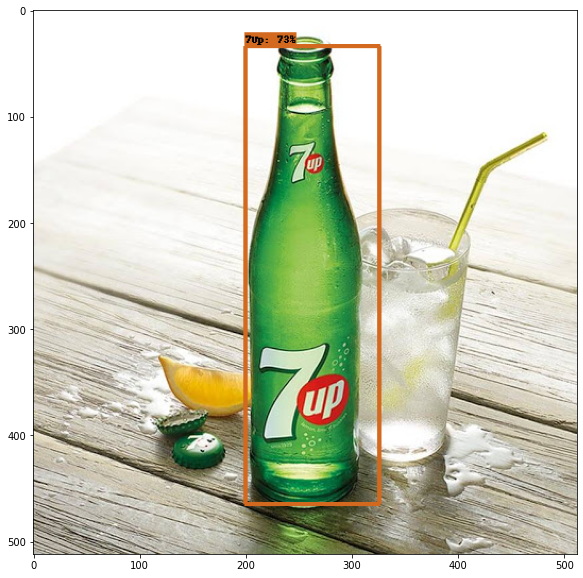

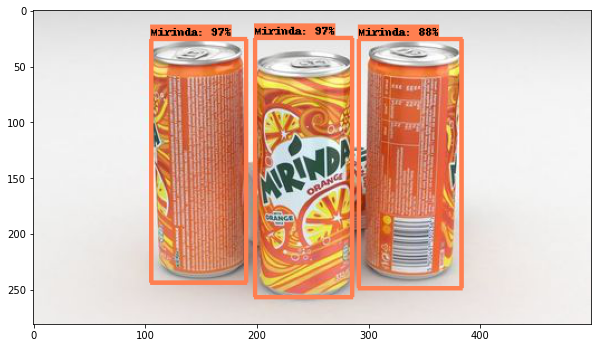

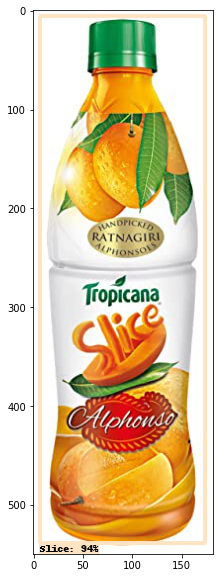

In [54]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.5,
            agnostic_mode=False)

    plt.figure(figsize=(10, 10))
    
    plt.imshow(image_np_with_detections)
    
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

## Export Model

In [55]:
# MODEL_NAME = ??? 

if 'MODEL_NAME' not in vars():
    MODEL_NAME = !ls -1 {TARGET}/{MODELS}/
    if len(MODEL_NAME) != 1:
        del MODEL_NAME
        raise SystemExit('''
Could not determine model name. Please specify above.
        ''')
    else:
        MODEL_NAME = MODEL_NAME[0]

MODEL_NAME

'efficientdet_d1_coco17_tpu-32'

In [56]:
!{python} exporter_main_v2.py --input_type=image_tensor --pipeline_config_path={TARGET}/{MODELS}/{MODEL_NAME}/pipeline.config --trained_checkpoint_dir={TARGET}/{MODELS}/{MODEL_NAME} --output_directory={TARGET}/{EXPORTED}/{MODEL_NAME}
!cp {TARGET}/{ANNOTATIONS}/{LABEL_MAP} {TARGET}/{EXPORTED}/{MODEL_NAME}

2021-04-24 01:08:38.561975: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-24 01:08:39.940215: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-24 01:08:39.940640: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-24 01:08:39.972944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-04-24 01:08:39.973762: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 computeCapability: 7.5
coreClock: 1.755GHz coreCount: 46 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-24 01:08:39.973808: I tensorflow/stream_executor/platform/default/d

# Exported Model Validation

In [75]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "{}/{}/{}/saved_model".format(TARGET,EXPORTED,MODEL_NAME)

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...

Done! Took 19.371204614639282 seconds


Running inference for /home/uniquetrij/.keras/datasets/image_01.jpg... [[0.0192498  0.3846206  0.9473201  0.62790185]
 [0.02031004 0.23796459 0.8956719  0.7251745 ]
 [0.21658337 0.76692563 0.79322505 0.99132293]
 [0.07584202 0.40896234 0.62145114 0.58625245]
 [0.18901584 0.45430836 0.8991773  0.71347415]
 [0.1689313  0.2792986  0.96234435 0.96908706]
 [0.36060497 0.29505503 0.93606734 0.6731321 ]
 [0.11785594 0.39721787 0.8885683  0.6183373 ]
 [0.         0.06525037 0.8628949  0.6083679 ]
 [0.04728566 0.4385394  0.4243067  0.5544589 ]
 [0.43427196 0.40374923 0.93026686 0.78536534]
 [0.40412968 0.75107485 1.         0.9812748 ]
 [0.18967026 0.65498143 0.9800139  0.97471553]
 [0.11785594 0.39721787 0.8885683  0.6183373 ]
 [0.16322607 0.57827264 0.81389844 0.7971522 ]
 [0.07584202 0.40896234 0.62145114 0.58625245]
 [0.07466102 0.40114793 0.69913876 0.59595287]
 [0.3909687  0.48657158 0.85234404 0.8932266 ]
 [0.1627002  0.38520855 0.9394859  0.6060345 ]
 [0.35922483 0.11719865 1.         0

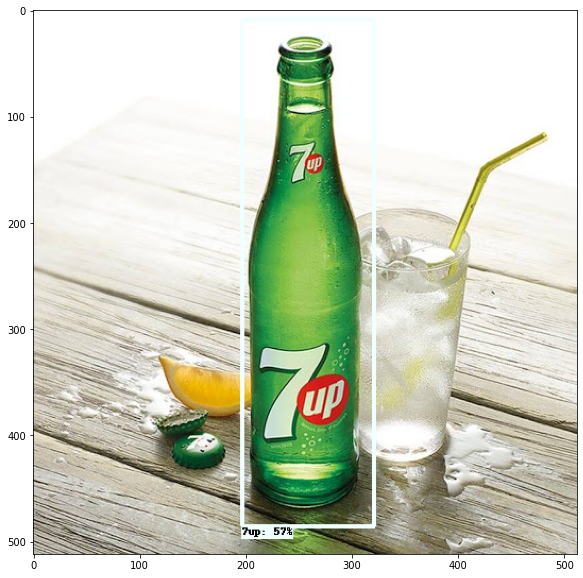

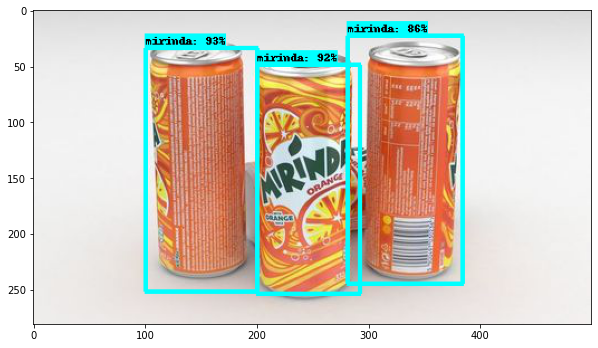

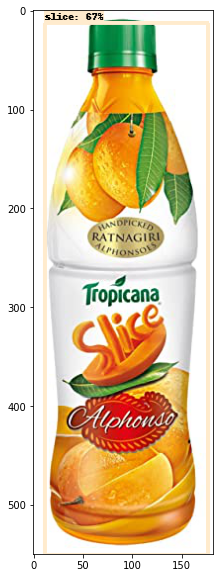

In [79]:
%matplotlib inline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()
    
    print(detections['detection_boxes'])
    print("============================")

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.5,
          agnostic_mode=False)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [80]:
detections = zip(detections['detection_classes'],
                         detections['detection_scores'],
                         detections['detection_boxes'])

detections = [x for x in detections if x[1] > 0.5]

In [81]:
detections

[(7,
  0.6680305,
  array([0.02395403, 0.06324705, 1.        , 0.9760183 ], dtype=float32))]